In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#readig the data into a dataframe
data=pd.read_csv('sentiment analysis.csv',encoding='latin-1')

In [3]:
data.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
ItemID           99989 non-null int64
Sentiment        99989 non-null int64
SentimentText    99989 non-null object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [6]:
data.columns

Index(['ItemID', 'Sentiment', 'SentimentText'], dtype='object')

In [7]:
data.dtypes

ItemID            int64
Sentiment         int64
SentimentText    object
dtype: object

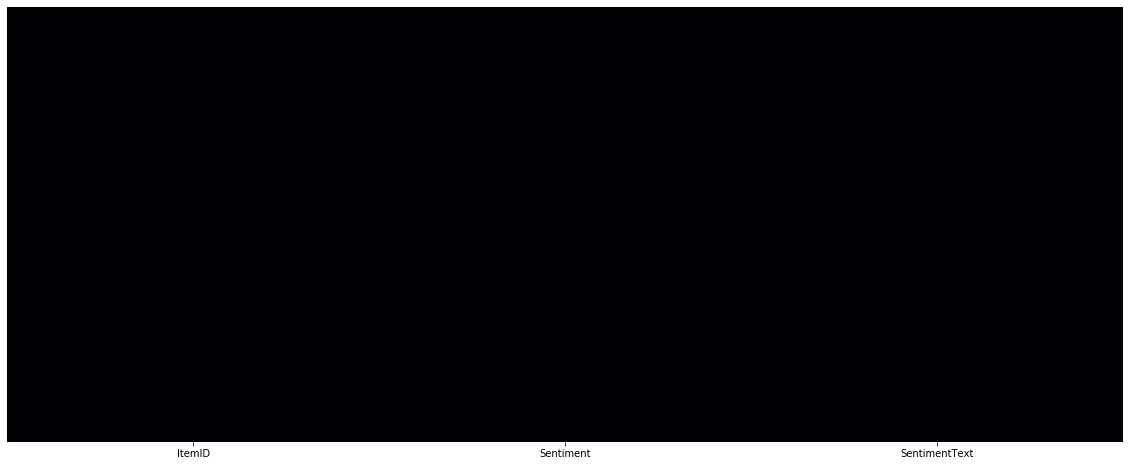

In [9]:
#checking for any null values in the dataset
plt.figure(figsize=(20,8))
sns.heatmap(data.isnull(),cmap='magma',yticklabels=False,cbar=False)

In [10]:
#removing itemid as we don't need it
data.drop('ItemID',inplace=True,axis=1)

In [12]:
#checking different sentiments in the data
data['Sentiment'].nunique()

2

In [13]:
#This is our target variable
y=data['Sentiment']

In [14]:
y.shape

(99989,)

In [15]:
#Removing all the special characters from the text
data['SentimentText'] = data['SentimentText'].str.replace('\W', ' ')

In [16]:
data.head(20)

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7 30 O
3,0,Omgaga Im sooo im gunna CRy I ...
4,0,i think mi bf is cheating on me ...
5,0,or i just worry too much
6,1,Juuuuuuuuuuuuuuuuussssst Chillin
7,0,Sunny Again Work Tomorrow ...
8,1,handed in my uniform today i miss you ...
9,1,hmmmm i wonder how she my number


In [17]:
#Here we imprt vectorizers to vectorize our data i.e create a sparse matrix of all the different words present in the dataset
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [18]:
#using lemmatizer to convert words back to their original form like playing is converted to play and worked is converted to work etc.
data['SentimentText']=data['SentimentText'].apply(lemmatizer.lemmatize)

In [19]:
#splitting our data 
X_train, X_test, y_train, y_test = train_test_split(data['SentimentText'], y, test_size=0.33, random_state=42)
cv=CountVectorizer(stop_words='english',encoding='latin-1',lowercase=True)
X_train=cv.fit_transform(X_train)
X_test=cv.transform(X_test)

In [23]:
#Importing different models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [24]:
lr=LogisticRegression()
rd=RandomForestClassifier()
dt=DecisionTreeClassifier()


In [25]:
#training our models
lr.fit(X_train,y_train)
rd.fit(X_train,y_train)
dt.fit(X_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
#Predicting the sentiment of the testing set
lrp=lr.predict(X_test)
rdp=rd.predict(X_test)
dtp=dt.predict(X_test)



In [27]:
#we will use classification report and confusion matrix as our evalution criteria
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print('Using logistic regression\n'+classification_report(y_test,lrp))




Using logistic regression
              precision    recall  f1-score   support

           0       0.74      0.66      0.70     14470
           1       0.76      0.82      0.79     18527

    accuracy                           0.75     32997
   macro avg       0.75      0.74      0.74     32997
weighted avg       0.75      0.75      0.75     32997



In [34]:
print('Using random forest algorithm\n'+classification_report(y_test,rdp))

Using random forest algorithm
              precision    recall  f1-score   support

           0       0.64      0.74      0.68     14470
           1       0.77      0.67      0.72     18527

    accuracy                           0.70     32997
   macro avg       0.70      0.71      0.70     32997
weighted avg       0.71      0.70      0.70     32997



In [35]:
print('Using decision tree algorithm\n'+classification_report(y_test,dtp))

Using decision tree algorithm
              precision    recall  f1-score   support

           0       0.62      0.69      0.65     14470
           1       0.73      0.66      0.70     18527

    accuracy                           0.68     32997
   macro avg       0.67      0.68      0.67     32997
weighted avg       0.68      0.68      0.68     32997

